# 1 SETTING

## 1 LIBRARIES

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 2 DATA

In [19]:
data = pd.read_excel("C:/Users/sec/Desktop/DSL/EDA2022-2/open/train.xlsx")
print(data.head())

   index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899         

## 3 CLEANING

In [20]:
#if employed = 365243, non-employed

data.loc[data['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

#(-1)

data['DAYS_BIRTH'] = (-1) * data['DAYS_BIRTH']
data['DAYS_EMPLOYED'] = (-1) * data['DAYS_EMPLOYED']
data['begin_month'] = (-1) * data['begin_month']

#NaN: 8171 na values only of occyp_type but # of unemployed is 4438 < 8171

ind_drop = (data[(data['DAYS_EMPLOYED'] != 0) & (data['occyp_type'].isna() == True)]).index
data = data.drop(ind_drop)
print(len(data))

22724


In [21]:
#Car

data.loc[data['car'] == 'Y', 'car'] = float(1)
data.loc[data['car'] == 'N', 'car'] = float(0)
data['car'] = pd.to_numeric(data['car'])
print(data['car'].describe())

#Reaility

data.loc[data['reality'] == 'Y', 'reality'] = float(1)
data.loc[data['reality'] == 'N', 'reality'] = float(0)
data['reality'] = pd.to_numeric(data['reality'])
print(data['reality'].describe())

count    22724.000000
mean         0.378102
std          0.484924
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: car, dtype: float64
count    22724.000000
mean         0.680470
std          0.466305
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reality, dtype: float64


In [40]:
#Income percentile

data.loc[data['income_total'] <= data['income_total'].quantile(0.1), 'income_percentile'] = 1

data.loc[(data['income_total'] > data['income_total'].quantile(0.1)) & 
         (data['income_total'] <= data['income_total'].quantile(0.2)), 'income_percentile'] = 2

data.loc[(data['income_total'] > data['income_total'].quantile(0.2)) & 
         (data['income_total'] <= data['income_total'].quantile(0.3)), 'income_percentile'] = 3

data.loc[(data['income_total'] > data['income_total'].quantile(0.3)) & 
         (data['income_total'] <= data['income_total'].quantile(0.4)), 'income_percentile'] = 4

data.loc[(data['income_total'] > data['income_total'].quantile(0.4)) & 
         (data['income_total'] <= data['income_total'].quantile(0.5)), 'income_percentile'] = 5

data.loc[(data['income_total'] > data['income_total'].quantile(0.5)) & 
         (data['income_total'] <= data['income_total'].quantile(0.6)), 'income_percentile'] = 6

data.loc[(data['income_total'] > data['income_total'].quantile(0.6)) & 
         (data['income_total'] <= data['income_total'].quantile(0.7)), 'income_percentile'] = 7

data.loc[(data['income_total'] > data['income_total'].quantile(0.7)) & 
         (data['income_total'] <= data['income_total'].quantile(0.8)), 'income_percentile'] = 8

data.loc[(data['income_total'] > data['income_total'].quantile(0.8)) & 
         (data['income_total'] <= data['income_total'].quantile(0.9)), 'income_percentile'] = 9

data.loc[data['income_total'] > data['income_total'].quantile(0.9), 'income_percentile'] = 10

print(data['income_percentile'].describe())


count    22724.000000
mean         5.273015
std          2.932324
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: income_percentile, dtype: float64


# 2 CREIDT, INCOME PERCENTILE, CAR

Text(0.5, 1.0, 'Average Credit Level VS Income Percentile')

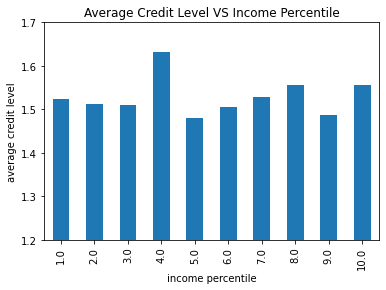

In [41]:
data.groupby('income_percentile')['credit'].mean().plot(kind = 'bar')
plt.ylim(1.2, 1.7)
plt.xlabel('income percentile')
plt.ylabel('average credit level')
plt.title('Average Credit Level VS Income Percentile')

Text(0.5, 1.0, 'Probability of owning house VS Income Percentile')

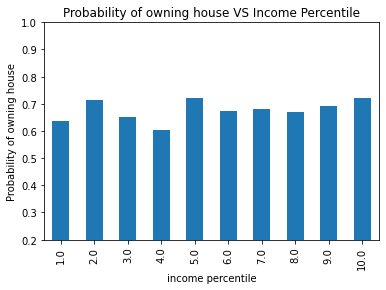

In [42]:
data.groupby('income_percentile')['reality'].mean().plot(kind = 'bar')
plt.ylim(0.2, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning house')
plt.title('Probability of owning house VS Income Percentile')

Text(0.5, 1.0, 'Probability of owning car VS Income Percentile')

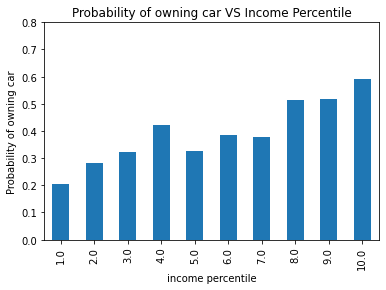

In [43]:
data.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.8)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Probability of owning car VS Income Percentile')

income_percentile  car
1.0                0.0    1.519345
                   1.0    1.545133
2.0                0.0    1.502444
                   1.0    1.536212
3.0                0.0    1.493254
                   1.0    1.541039
4.0                0.0    1.681818
                   1.0    1.562500
5.0                0.0    1.507544
                   1.0    1.423940
6.0                0.0    1.475741
                   1.0    1.555195
7.0                0.0    1.519647
                   1.0    1.544489
8.0                0.0    1.593207
                   1.0    1.522031
9.0                0.0    1.479634
                   1.0    1.491486
10.0               0.0    1.530461
                   1.0    1.571429
Name: credit, dtype: float64


(1.2, 1.8)

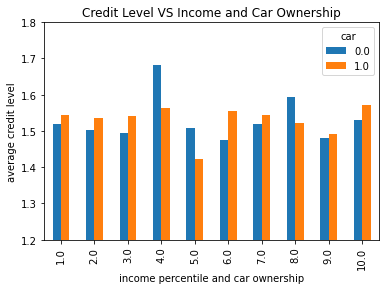

In [46]:
print(data.groupby(['income_percentile', 'car'])['credit'].mean())

data.groupby(['income_percentile', 'car'])['credit'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and car ownership')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and Car Ownership')
plt.ylim(1.2,1.8)